<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Question 1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

<ipython-input-6-aa45da774d28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CHAS',y='MEDV',data=boston_df, palette=['blue','orange'])


<AxesSubplot:title={'center':'The median value of houses bounded by the Charles river[1] or not[0]'}, xlabel='CHAS', ylabel='MEDV'>

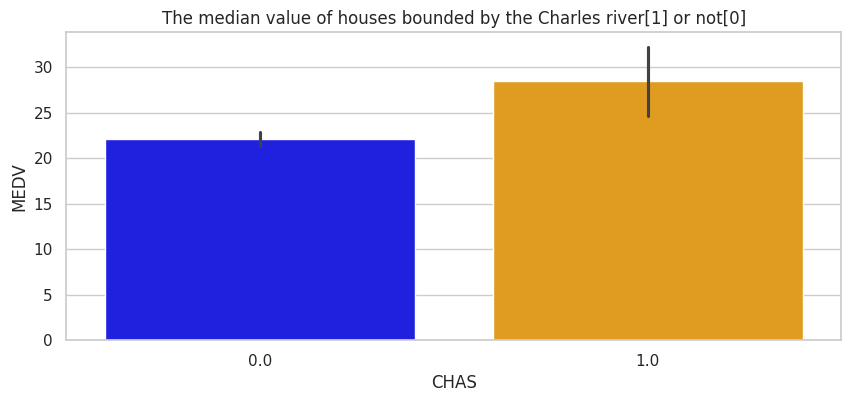

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
plt.title("The median value of houses bounded by the Charles river[1] or not[0]")
sns.barplot(x='CHAS',y='MEDV',data=boston_df, palette=['blue','orange'])

### From visual data, it appears that there is a differnece in median values of houses bounded by Charles riverand those not. 

## **Levene test to state if there is a difference in variance of two samples.**
### Null hypothesis - there is no difference in the median value of houses bounded by Charles river.
### Alt hypothesis - there is a difference in the median value of houses bounded by Charles river.

In [7]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

### P-value is less than 0.05 and so the null hypothesis is rejected, thus there is a difference in the variance between houses bounded by Charles river and those not. 

## **T-test to find if the difference is statistically significant.**


In [8]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

### We can conclude that since the p-value is less than alpha value 0.05, we can reject the null hypothesis as there is enough proof that there is a significant statistical difference in the median value of houses bounded by the Charles river and those not.

# Question 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

In [9]:
boston_df.loc[(boston_df['AGE']<=35),'age']='35 and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age']='between 35 and 70'
boston_df.loc[boston_df['AGE']>=70,'age']='70 and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


<ipython-input-11-c919464fa731>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='MEDV', y='age', data=boston_df, palette=['blue','orange','green'])


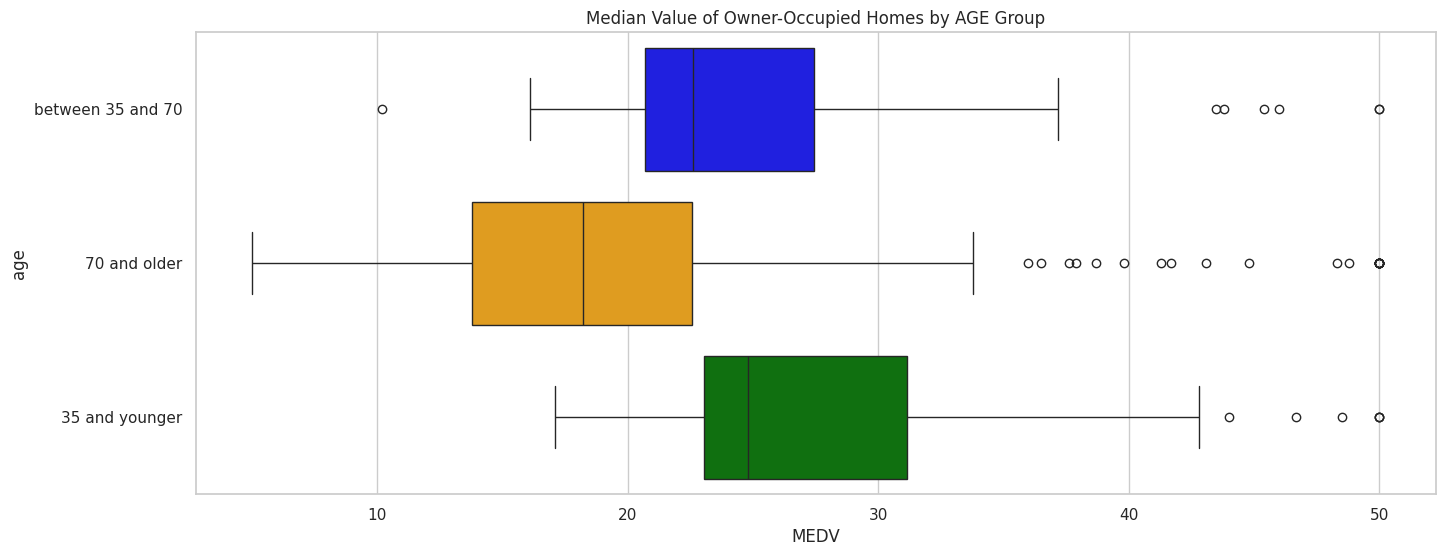

In [11]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='MEDV', y='age', data=boston_df, palette=['blue','orange','green'])
plt.title("Median Value of Owner-Occupied Homes by AGE Group")
plt.show()

### From box plot, it appears that one of the samples has a difference in median values of houses of each proportion of owner-occupied units built before 1940.

## **Apply the ANOVA test**
### Null hypothesis - There is no difference in median values of houses of each propotion of owner occupied units built before 1940.
### Alt Hypothesis - There is a difference in median values of houses of each propotion of owner occupied units built before 1940.

In [12]:
a35_younger=boston_df[boston_df['age']=='35 and younger']['MEDV']
between_35_70=boston_df[boston_df['age']=='between 35 and 70']['MEDV']
a70_older=boston_df[boston_df['age']=='70 and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(a35_younger, between_35_70, a70_older)
print('The f_statistic value obtained from the ANOVA test :'+str(f_statistic)+', and the P-value obtained is :'+str(p_value) )

The f_statistic value obtained from the ANOVA test :36.40764999196599, and the P-value obtained is :1.7105011022702984e-15


### The p value is less than 0.05 so this would indicate that at leats one of the samples has a significantly different mean value for the MEDV compared to others. This means we would reject the null hypothesis and that there is a difference in median values of houses of each proportion of owner-occupied units built before 1940.

# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

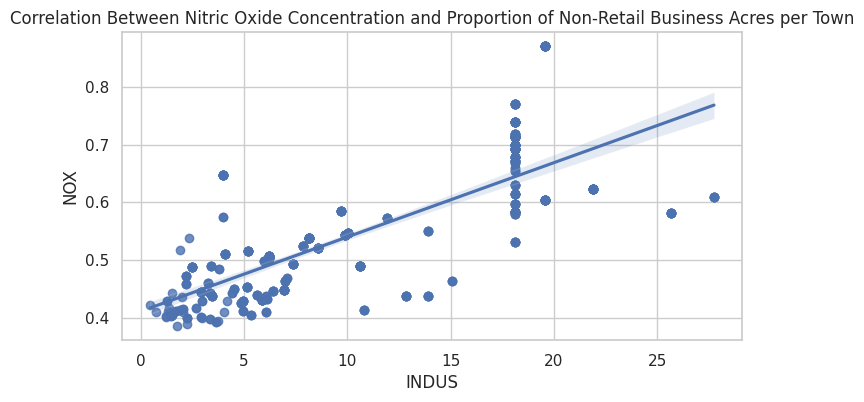

In [13]:
plt.figure(figsize=(8,4))
sns.regplot(x='INDUS',y='NOX',data=boston_df)
plt.title("Correlation Between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres per Town")
plt.show()

### From visual plot it appears that there is a positive correlation between Nitric oxide concentrations and proportion of non-retail business acres.


## Apply correlation test
### Null hypothesis - There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
### Alt hypothesis - There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [14]:
a,p=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("The p-value obtained from the Pearson test is "+str(p)+", with a correlation coefficient of "+str(a))

The p-value obtained from the Pearson test is 7.913361061210442e-98, with a correlation coefficient of 0.7636514469209192


### The p value is below and 0.05 and the correlation coefficient is above 0.5. Thus there is enough evidence to reject the null hypothesis and there is a relationship between Nitric oxide content and proportion of non-business retail acres.

# Quetion 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [15]:
X = boston_df['DIS']
X = sm.add_constant(X)
Y=boston_df['MEDV']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        14:10:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Calculate R<sup>2</sup> for regression analysis**

In [18]:
correlation_coef=math.sqrt(0.062)
print("The correlation coef is: "+str(correlation_coef))

The correlation coef is: 0.24899799195977465


### The coefficient for the additional weighted distance to the five Boston employment centers (DIS) is 1.0916, which indicates that for each unit increase in the additional weighted distance, the median value of owner-occupied homes increases by 1,091.6

# Histogram for pupil to teacher ratio

Text(0, 0.5, 'frequency')

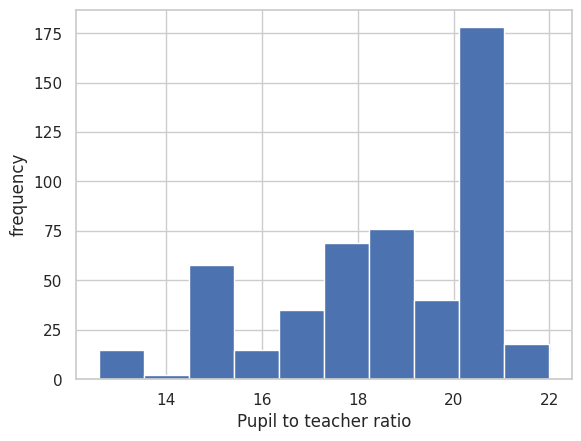

In [20]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('frequency')